# CENG 489 Data Mining
## Assignment 3 - Analysing a Toy Covid Data: Predict Clinical Cases and Association Rules
## Due: December 30 by 11:59pm

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Dataset Preparation

#### Loading Data

In [3]:
#read data from given xls ("COVID19 inpatient cases data.xls") (2nd sheet, not first sheet)
xls = pd.ExcelFile('C://Users//LENOVO//Desktop//DataMining//COVID19 inpatient cases data.xls')
#parantez içindeki değer 0 olursa ilk sheet, 1 olursa 2. sheet
df1 = xls.parse(1)
#look the first 5 records of data
df1

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Clinical outcome,"Hospital stay, days"
0,Male,47,Heavy,15,Y,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,N,"Aggravated,turn to ICU",NaN
1,Female,53,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,6.0
2,Female,57,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge,8.0
3,Male,58,Heavy,1,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,"Aggravated,transfer to superior hospital",NaN
4,Male,54,Ordinary,10,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Female,30,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge,24.0
69,Female,59,Ordinary,10,N,N,Y,N,N,N,N,N,N,Y,N,Y,N,N,Improved and discharge,16.0
70,Female,87,Ordinary,10,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,Improved and discharge,14.0
71,Female,56,Ordinary,20,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge,12.0


In [4]:
# check column names
df1.columns

Index(['Gender', 'Age', 'Clinical classification',
       'Days from symptoms to hospital', 'No comorbidity',
       'Cardiovascular and\ncerebrovascular disease',
       'Endocrine system disease', 'Malignant tumor',
       'Respiratory system disease', 'Digestive system disease',
       'Renal disease', 'Liver disease', 'Fever', 'Cough', 'Chest tightness',
       'Fatigue', 'Diarrhea', 'Others', 'Clinical outcome',
       'Hospital stay, days'],
      dtype='object')

In [5]:
#  not null count
df1.notnull().count()

Gender                                         73
Age                                            73
Clinical classification                        73
Days from symptoms to hospital                 73
No comorbidity                                 73
Cardiovascular and\ncerebrovascular disease    73
Endocrine system disease                       73
Malignant tumor                                73
Respiratory system disease                     73
Digestive system disease                       73
Renal disease                                  73
Liver disease                                  73
Fever                                          73
Cough                                          73
Chest tightness                                73
Fatigue                                        73
Diarrhea                                       73
Others                                         73
Clinical outcome                               73
Hospital stay, days                            73


In [6]:
# data types 
df1.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 20 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Gender                                      object 
 1   Age                                         int64  
 2   Clinical classification                     object 
 3   Days from symptoms to hospital              int64  
 4   No comorbidity                              object 
 5   Cardiovascular and
cerebrovascular disease  object 
 6   Endocrine system disease                    object 
 7   Malignant tumor                             object 
 8   Respiratory system disease                  object 
 9   Digestive system disease                    object 
 10  Renal disease                               object 
 11  Liver disease                               object 
 12  Fever                                       object 
 13  Cough                                

#### Dataset preprocessing 

##### Datasets for FIM and Rule extraction

In [7]:
# symptom_cols = ['Fever', 'Cough','Chest tightness', 'Fatigue', 'Diarrhea', 'Others']
# create df_symtoms dataframe including given columns
df_symptoms = pd.DataFrame(df1, columns = ['Fever', 'Cough','Chest tightness', 'Fatigue', 'Diarrhea', 'Others']) 
df_symptoms.head(5)


,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others
0,Y,Y,Y,Y,Y,N
1,Y,Y,Y,N,N,N
2,Y,Y,N,N,N,N
3,N,N,N,N,N,N
4,Y,Y,Y,N,N,N


In [8]:
# add "Covid19" columns assign all entries as "Y"
df_symptoms['Covid19'] = 'Y'
df_symptoms.head(5)

,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Covid19
0,Y,Y,Y,Y,Y,N,Y
1,Y,Y,Y,N,N,N,Y
2,Y,Y,N,N,N,N,Y
3,N,N,N,N,N,N,Y
4,Y,Y,Y,N,N,N,Y


In [9]:
disease_cols = ['Cardiovascular and\ncerebrovascular disease', 'Endocrine system disease','Malignant tumor','Respiratory system disease', 
                'Digestive system disease','Renal disease','Liver disease']
other_cols= ['Age','Gender']
# create df_diseases dataframe consisting records of given cols(disease_cols and other_cols) from main dataframe
df_diseases = pd.DataFrame(df1, columns = ['Cardiovascular and\ncerebrovascular disease', 'Endocrine system disease','Malignant tumor','Respiratory system disease', 
                'Digestive system disease','Renal disease','Liver disease','Age','Gender']) 

df_diseases.head(5)

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Age,Gender
0,N,N,N,N,N,N,N,47,Male
1,N,N,N,N,N,N,N,53,Female
2,N,N,N,N,N,N,N,57,Female
3,N,Y,N,N,N,N,N,58,Male
4,N,N,N,N,N,N,N,54,Male


In [10]:
# add also "Clinicial classification" attribute from main dataframe calling  this column as "Illness" in your df_diseases dataframe
df_diseases['Illness']=df1['Clinical classification']
# add " ill" string to all records in "illness" attribute 
df_diseases['Illness'] = 'ill'
df_diseases.head(5)

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Age,Gender,Illness
0,N,N,N,N,N,N,N,47,Male,ill
1,N,N,N,N,N,N,N,53,Female,ill
2,N,N,N,N,N,N,N,57,Female,ill
3,N,Y,N,N,N,N,N,58,Male,ill
4,N,N,N,N,N,N,N,54,Male,ill


In [11]:
# categorize ages as "Elderly" (Age>=65), 
#                        "Adults" (18<= Age <65),
#                        "Teens" (12=<Age<18),
#                        "Children" (1<Age<11), 
#                        "Infants" (Age<=1)

bins= [0,1,11,17,64,110]
labels = ['Infant','Children','Teens','Adults','Elderly']
df_diseases['AgeGroup'] = pd.cut(df_diseases['Age'], bins=bins, labels=labels, right=False)
df_diseases.head(5)

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Age,Gender,Illness,AgeGroup
0,N,N,N,N,N,N,N,47,Male,ill,Adults
1,N,N,N,N,N,N,N,53,Female,ill,Adults
2,N,N,N,N,N,N,N,57,Female,ill,Adults
3,N,Y,N,N,N,N,N,58,Male,ill,Adults
4,N,N,N,N,N,N,N,54,Male,ill,Adults


In [12]:
# in new column "Age Group", drop "Age" column in df_disease dataframe.
df_diseases = df_diseases.drop('Age', axis=1)
df_diseases

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Gender,Illness,AgeGroup
0,N,N,N,N,N,N,N,Male,ill,Adults
1,N,N,N,N,N,N,N,Female,ill,Adults
2,N,N,N,N,N,N,N,Female,ill,Adults
3,N,Y,N,N,N,N,N,Male,ill,Adults
4,N,N,N,N,N,N,N,Male,ill,Adults
...,...,...,...,...,...,...,...,...,...,...
68,N,N,N,N,N,N,N,Female,ill,Adults
69,N,Y,N,N,N,N,N,Female,ill,Adults
70,Y,N,N,N,N,N,N,Female,ill,Elderly
71,Y,N,N,N,N,N,N,Female,ill,Adults


In [13]:
# Get one hot encoding of columns "Gender", "Illness", "Age Group"
one_hot_gender = pd.get_dummies(df_diseases['Gender'])
one_hot_illness = pd.get_dummies(df_diseases['Illness'])
one_hot_ageGroup = pd.get_dummies(df_diseases['AgeGroup'])
# Drop columns "Gender", "Illness", "Age Group" as it is now encoded
df_diseases = df_diseases.drop('Gender',axis = 1)
df_diseases = df_diseases.drop('Illness',axis = 1)
df_diseases = df_diseases.drop('AgeGroup',axis = 1)
# Join the encoded df_diseases
df_diseases = df_diseases.join(one_hot_gender)
df_diseases = df_diseases.join(one_hot_illness)
df_diseases = df_diseases.join(one_hot_ageGroup)
df_diseases

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Female,Male,ill,Infant,Children,Teens,Adults,Elderly
0,N,N,N,N,N,N,N,0,1,1,0,0,0,1,0
1,N,N,N,N,N,N,N,1,0,1,0,0,0,1,0
2,N,N,N,N,N,N,N,1,0,1,0,0,0,1,0
3,N,Y,N,N,N,N,N,0,1,1,0,0,0,1,0
4,N,N,N,N,N,N,N,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,N,N,N,N,N,N,N,1,0,1,0,0,0,1,0
69,N,Y,N,N,N,N,N,1,0,1,0,0,0,1,0
70,Y,N,N,N,N,N,N,1,0,1,0,0,0,0,1
71,Y,N,N,N,N,N,N,1,0,1,0,0,0,1,0


In [14]:
# convert all data to bool (True or False) (by replacing or mapping attribute values ) for df_symptoms dataframe
df_symptoms.replace({
                'Y' :True,
                'N' :False
            })




,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Covid19
0,True,True,True,True,True,False,True
1,True,True,True,False,False,False,True
2,True,True,False,False,False,False,True
3,False,False,False,False,False,False,True
4,True,True,True,False,False,False,True
...,...,...,...,...,...,...,...
68,True,True,False,False,False,False,True
69,False,True,False,True,False,False,True
70,False,True,False,False,False,False,True
71,True,True,False,False,False,False,True


In [15]:
# same for df_diseases dataframe

df_diseases.replace(('Y', 'N'), (1, 0), inplace=True)
df_diseases.replace({
                1 :True,
                0 :False
            })



,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Female,Male,ill,Infant,Children,Teens,Adults,Elderly
0,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
3,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
69,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False
70,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True
71,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False


In [16]:
# install mlxtend library (suggested version is 0.15.0.0)

In [17]:
# create "df_symptoms_extended" concatanating df_symptoms with df_diseases dummy attributes of "Gender", "Illness", "Age Group" and their records.
# drop "Covid19" attribute in extended dataframe
df_symptoms_extended = pd.concat([df_symptoms, df_diseases], axis=1)
df_symptoms_extended.drop('Covid19', axis=1, inplace=True)
df_symptoms_extended

,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,...,Renal disease,Liver disease,Female,Male,ill,Infant,Children,Teens,Adults,Elderly
0,Y,Y,Y,Y,Y,N,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,Y,Y,Y,N,N,N,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,Y,Y,N,N,N,N,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,N,N,N,N,N,N,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,Y,Y,Y,N,N,N,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Y,Y,N,N,N,N,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
69,N,Y,N,Y,N,N,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
70,N,Y,N,N,N,N,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
71,Y,Y,N,N,N,N,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


#### Fill mising values with KNN

The usage of KNNImputer is not allowed.

In [512]:
# show missing record as (number of missings/total) (should be only "Hospital stay, days") 
print(df1['Hospital stay, days'].isnull().sum(), "/", df1['Hospital stay, days'].count().sum(), "(number of missings/total in Hospital stay, days)")

4 / 69 (number of missings/total in Hospital stay, days)


In [513]:
# copy dataframe df1 to df2 
df2=df1.copy()
# convert bools and strings to numeric attributes ('Male':1, 'Female':2, 'Heavy':1, 'Ordinary':2, 'Y':1, 'N':0)
df2.replace(('Male', 'Female','Heavy','Ordinary','Y','N'), (1,2,1,2,1,0), inplace=True)
df2

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Clinical outcome,"Hospital stay, days"
0,1,47,1,15,1,0,0,0,0,0,0,0,1,1,1,1,1,0,"Aggravated,turn to ICU",NaN
1,2,53,2,13,1,0,0,0,0,0,0,0,1,1,1,0,0,0,Improved and discharge,6.0
2,2,57,2,13,1,0,0,0,0,0,0,0,1,1,0,0,0,0,Improved and discharge,8.0
3,1,58,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"Aggravated,transfer to superior hospital",NaN
4,1,54,2,10,1,0,0,0,0,0,0,0,1,1,1,0,0,0,Improved and discharge,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2,30,2,13,1,0,0,0,0,0,0,0,1,1,0,0,0,0,Improved and discharge,24.0
69,2,59,2,10,0,0,1,0,0,0,0,0,0,1,0,1,0,0,Improved and discharge,16.0
70,2,87,2,10,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Improved and discharge,14.0
71,2,56,2,20,0,1,0,0,0,0,0,0,1,1,0,0,0,0,Improved and discharge,12.0


In [1]:
from sklearn.preprocessing import MinMaxScaler
def min_max_scale(df):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    df = df.reshape(df.shape[0], df.shape[1])
    df_scaler = scaler.transform(df)
 
    return scaler, df_scaler

def inv_min_max_scale(df, scaled_val):
    scaler=MinMaxScaler()
    new_row = [x for x in df] + [scaled_val]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [515]:
# min_max_scale for scaling missing atttribute (you will need for "nan" values)

# scale other nonmissing attributes using MinMaxScaler in sklearn
#String could't not convert to float, so i drop this column
df2.drop('Clinical outcome', axis=1, inplace=True)
scaler = MinMaxScaler() 
minmax_df = scaler.fit_transform(df2) 
minmax_df = pd.DataFrame(minmax_df)
minmax_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.393939,0.0,0.358974,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN
1,1.0,0.484848,1.0,0.307692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.06250
2,1.0,0.545455,1.0,0.307692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.12500
3,0.0,0.560606,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.500000,1.0,0.230769,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.03125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1.0,0.136364,1.0,0.307692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.62500
69,1.0,0.575758,1.0,0.230769,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.37500
70,1.0,1.000000,1.0,0.230769,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.31250
71,1.0,0.530303,1.0,0.487179,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.25000


In [516]:
# fill missing values based on KNeighborsRegressor regression in sklearn (for k=7)
#-----------from sklearn.impute import KNNImputer
#-----------imputer = KNNImputer(n_neighbors=7)

# don't forget to convert original range

# fill df1 missings with given values
#--------df1 = imputer.fit_transform(df2)

from sklearn.neighbors import KNeighborsRegressor

df2= df2.replace(({None:0}))

X = df2.drop('Hospital stay, days' , axis=1) # feature
y = df2['Hospital stay, days'] #target


neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(X, y)
df2=neigh.predict(X)
df2

array([ 8.85714286, 13.42857143, 15.        , 11.14285714, 14.57142857,
       15.42857143, 11.42857143, 16.57142857, 12.57142857,  8.57142857,
       19.        ,  9.28571429, 13.57142857, 15.57142857, 14.57142857,
       12.85714286, 13.42857143, 14.57142857, 13.28571429, 15.85714286,
       21.28571429, 13.        , 13.57142857, 16.        , 10.71428571,
       14.85714286, 12.42857143, 21.42857143, 13.71428571, 13.        ,
       11.28571429, 17.42857143, 19.14285714, 14.57142857, 16.85714286,
        9.28571429, 14.57142857, 12.85714286, 19.14285714,  8.85714286,
       21.14285714, 14.14285714, 16.71428571, 15.57142857, 11.85714286,
       13.14285714, 15.71428571, 15.14285714, 20.        , 13.28571429,
       14.14285714, 20.42857143, 18.42857143, 18.42857143, 14.57142857,
       15.57142857, 14.71428571, 11.        , 17.57142857, 17.28571429,
       17.42857143, 13.        , 11.        , 12.85714286, 18.42857143,
       21.28571429, 18.42857143, 20.42857143, 13.57142857, 15.85

#### Dataset for classification task

In [517]:
# copy df1 to data_df datafarme
data_df=df1.copy()
data_df= data_df.replace(({None:0}))
# convert attribute values to 0 and 1 ('Y':1, 'N':0, 'Male':0, "Female":1)
data_df.replace(('Male', 'Female','Y','N'), (0,1,1,0), inplace=True)
data_df=data_df.drop('Clinical outcome', axis=1)
# split data: label attribute 'Clinical classification' as Y, features as X (including nonmissing features)

# create X (features) and y (response)
X = data_df.drop('Clinical classification' , axis=1) # feature
y = data_df['Clinical classification'] #target

data_df

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,"Hospital stay, days"
0,0,47,Heavy,15,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0.0
1,1,53,Ordinary,13,1,0,0,0,0,0,0,0,1,1,1,0,0,0,6.0
2,1,57,Ordinary,13,1,0,0,0,0,0,0,0,1,1,0,0,0,0,8.0
3,0,58,Heavy,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0,54,Ordinary,10,1,0,0,0,0,0,0,0,1,1,1,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1,30,Ordinary,13,1,0,0,0,0,0,0,0,1,1,0,0,0,0,24.0
69,1,59,Ordinary,10,0,0,1,0,0,0,0,0,0,1,0,1,0,0,16.0
70,1,87,Ordinary,10,0,1,0,0,0,0,0,0,0,1,0,0,0,0,14.0
71,1,56,Ordinary,20,0,1,0,0,0,0,0,0,1,1,0,0,0,0,12.0


In [518]:
# Split dataset as train and test set using sklearn (for random_state=44) 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=44)

# x_train, x_val, y_test, y_test = # to-do
print(X_train.shape)
print(X_test.shape)

(43, 18)
(30, 18)


### Apriori Part: Frequent Itemset Mining, Association Rule Extraction 

In [519]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [520]:
# find itemsets for df_symptoms data with min support=0.02 
df_symptoms.replace(('Y', 'N'), (1, 0), inplace=True)
df_ap = apriori(df_symptoms, min_support=0.02, use_colnames=True)
df_ap
# df_ap = # to-do

,support,itemsets
0,0.753425,(Fever)
1,0.753425,(Cough)
2,0.287671,(Chest tightness)
3,0.136986,(Fatigue)
4,0.109589,(Diarrhea)
...,...,...
66,0.027397,"(Fatigue, Diarrhea, Covid19, Cough)"
67,0.027397,"(Fatigue, Others, Covid19, Cough)"
68,0.054795,"(Covid19, Chest tightness, Fever, Fatigue, Cough)"
69,0.027397,"(Covid19, Diarrhea, Fever, Fatigue, Cough)"


In [521]:
# find itemsets for df_symptoms_extended data with min support=0.02 
df_symptoms_extended.replace(('Y', 'N'), (1, 0), inplace=True)
df_ap_extended = apriori(df_symptoms_extended, min_support=0.02, use_colnames=True)
df_ap_extended
# df_ap_extended = # to-do

,support,itemsets
0,0.753425,(Fever)
1,0.753425,(Cough)
2,0.287671,(Chest tightness)
3,0.136986,(Fatigue)
4,0.109589,(Diarrhea)
...,...,...
688,0.041096,"(Adults, Chest tightness, ill, Fatigue, Female..."
689,0.027397,"(Diarrhea, Adults, ill, Male, Fatigue, Cough)"
690,0.027397,"(Cardiovascular and\ncerebrovascular disease, ..."
691,0.041096,"(Adults, Chest tightness, Fever, ill, Fatigue,..."


In [522]:
# find itemsets for df_diseases data with min support=0.02 

df_ap_diseases = apriori(df_diseases, min_support=0.02, use_colnames=True)
df_ap_diseases
# df_ap_diseases = # to-do

,support,itemsets
0,0.273973,(Cardiovascular and\ncerebrovascular disease)
1,0.136986,(Endocrine system disease)
2,0.054795,(Malignant tumor)
3,0.493151,(Female)
4,0.506849,(Male)
...,...,...
62,0.082192,"(Cardiovascular and\ncerebrovascular disease, ..."
63,0.054795,"(Female, ill, Elderly, Endocrine system disease)"
64,0.054795,"(ill, Adults, Endocrine system disease, Male)"
65,0.027397,"(Female, Malignant tumor, Elderly, ill)"


In [523]:
# use mlxtend for generating association rules from symptoms itemset  (with min confidence =0.6)
# show rules with min support= 0.2
df_ap1 = apriori(df_symptoms, min_support=0.2, use_colnames=True)
rules0= association_rules(df_ap1, metric="confidence", min_threshold=0.6)
rules0


# rules0 = #to-do

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cough),(Fever),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
1,(Fever),(Cough),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
2,(Chest tightness),(Fever),0.287671,0.753425,0.260274,0.904762,1.200866,0.043535,2.589041
3,(Covid19),(Fever),1.000000,0.753425,0.753425,0.753425,1.000000,0.000000,1.000000
4,(Fever),(Covid19),0.753425,1.000000,0.753425,1.000000,1.000000,0.000000,inf
5,(Chest tightness),(Cough),0.287671,0.753425,0.246575,0.857143,1.137662,0.029837,1.726027
6,(Covid19),(Cough),1.000000,0.753425,0.753425,0.753425,1.000000,0.000000,1.000000
7,(Cough),(Covid19),0.753425,1.000000,0.753425,1.000000,1.000000,0.000000,inf
8,(Chest tightness),(Covid19),0.287671,1.000000,0.287671,1.000000,1.000000,0.000000,inf
9,"(Cough, Chest tightness)",(Fever),0.246575,0.753425,0.219178,0.888889,1.179798,0.033402,2.219178


In [524]:
# use mlxtend for generating association rules from extended symptoms itemset  (with min confidence =0.6)
# show rules with min support= 0.2
df_ap_extended1 = apriori(df_symptoms_extended, min_support=0.2, use_colnames=True)
rules1= association_rules(df_ap_extended1, metric="confidence", min_threshold=0.6)
rules1
# rules1 = # to-do

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cough),(Fever),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
1,(Fever),(Cough),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
2,(Chest tightness),(Fever),0.287671,0.753425,0.260274,0.904762,1.200866,0.043535,2.589041
3,(Cardiovascular and\ncerebrovascular disease),(Fever),0.273973,0.753425,0.219178,0.800000,1.061818,0.012760,1.232877
4,(Female),(Fever),0.493151,0.753425,0.424658,0.861111,1.142929,0.053106,1.775342
...,...,...,...,...,...,...,...,...,...
154,"(Female, Adults, Cough)","(ill, Fever)",0.246575,0.753425,0.232877,0.944444,1.253535,0.047101,4.438356
155,"(Female, Cough, Fever)","(ill, Adults)",0.328767,0.657534,0.232877,0.708333,1.077257,0.016701,1.174168
156,"(Female, ill, Cough)","(Adults, Fever)",0.383562,0.493151,0.232877,0.607143,1.231151,0.043723,1.290162
157,"(Female, Adults)","(ill, Cough, Fever)",0.328767,0.589041,0.232877,0.708333,1.202519,0.039219,1.409002


In [525]:
# use mlxtend for generating association rules from disease itemset  (with min confidence =0.6)
# show rules with min support= 0.1
df_ap_diseases1 = apriori(df_diseases, min_support=0.1, use_colnames=True)
rules2= association_rules(df_ap_diseases1, metric="confidence", min_threshold=0.6)
rules2
# rules2 = # to-do

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cardiovascular and\ncerebrovascular disease),(ill),0.273973,1.000000,0.273973,1.000000,1.000000,0.000000,inf
1,(Endocrine system disease),(ill),0.136986,1.000000,0.136986,1.000000,1.000000,0.000000,inf
2,(Female),(ill),0.493151,1.000000,0.493151,1.000000,1.000000,0.000000,inf
3,(Female),(Adults),0.493151,0.657534,0.328767,0.666667,1.013889,0.004504,1.027397
4,(Male),(ill),0.506849,1.000000,0.506849,1.000000,1.000000,0.000000,inf
5,(Male),(Adults),0.506849,0.657534,0.328767,0.648649,0.986486,-0.004504,0.974710
6,(ill),(Adults),1.000000,0.657534,0.657534,0.657534,1.000000,0.000000,1.000000
7,(Adults),(ill),0.657534,1.000000,0.657534,1.000000,1.000000,0.000000,inf
8,(Elderly),(ill),0.342466,1.000000,0.342466,1.000000,1.000000,0.000000,inf
9,"(Female, Cardiovascular and\ncerebrovascular d...",(ill),0.136986,1.000000,0.136986,1.000000,1.000000,0.000000,inf


In [526]:
#find rules such as (...)-> (Covid19)    (min confidence= 0.6, min support = 0.2)
# from rules0
rules0["antecedent_len"] = rules0["antecedents"].apply(lambda x: len(x))
rules0[ (rules0['antecedent_len'] == 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Cough),(Fever),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137,1
1,(Fever),(Cough),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137,1
2,(Chest tightness),(Fever),0.287671,0.753425,0.260274,0.904762,1.200866,0.043535,2.589041,1
3,(Covid19),(Fever),1.000000,0.753425,0.753425,0.753425,1.000000,0.000000,1.000000,1
4,(Fever),(Covid19),0.753425,1.000000,0.753425,1.000000,1.000000,0.000000,inf,1
5,(Chest tightness),(Cough),0.287671,0.753425,0.246575,0.857143,1.137662,0.029837,1.726027,1
6,(Covid19),(Cough),1.000000,0.753425,0.753425,0.753425,1.000000,0.000000,1.000000,1
7,(Cough),(Covid19),0.753425,1.000000,0.753425,1.000000,1.000000,0.000000,inf,1
8,(Chest tightness),(Covid19),0.287671,1.000000,0.287671,1.000000,1.000000,0.000000,inf,1
11,(Chest tightness),"(Cough, Fever)",0.287671,0.589041,0.219178,0.761905,1.293466,0.049728,1.726027,1


In [527]:
# find rules such as (item1, item2)->(..) (length of antecedents is at least 2)(min confidence= 0.6, min support = 0.1)
# from rules1 and rules2

In [528]:
# rules1
df_ap_extended1 = apriori(df_symptoms_extended, min_support=0.1, use_colnames=True)
rules1= association_rules(df_ap_extended1, metric="confidence", min_threshold=0.6)
rules1["antecedent_len"] = rules1["antecedents"].apply(lambda x: len(x))
rules1[ (rules1['antecedent_len'] >= 2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
36,"(Cough, Chest tightness)",(Fever),0.246575,0.753425,0.219178,0.888889,1.179798,0.033402,2.219178,2
37,"(Chest tightness, Fever)",(Cough),0.260274,0.753425,0.219178,0.842105,1.117703,0.023081,1.561644,2
39,"(Cardiovascular and\ncerebrovascular disease, ...",(Fever),0.191781,0.753425,0.150685,0.785714,1.042857,0.006193,1.150685,2
40,"(Cardiovascular and\ncerebrovascular disease, ...",(Cough),0.219178,0.753425,0.150685,0.687500,0.912500,-0.014449,0.789041,2
41,"(Female, Cough)",(Fever),0.383562,0.753425,0.328767,0.857143,1.137662,0.039782,1.726027,2
...,...,...,...,...,...,...,...,...,...,...
299,"(ill, Adults, Cough, Male)",(Fever),0.246575,0.753425,0.164384,0.666667,0.884848,-0.021392,0.739726,4
300,"(Male, ill, Cough, Fever)",(Adults),0.260274,0.657534,0.164384,0.631579,0.960526,-0.006755,0.929550,4
301,"(Male, Adults, Fever)","(ill, Cough)",0.191781,0.753425,0.164384,0.857143,1.137662,0.019891,1.726027,3
302,"(Adults, Cough, Male)","(ill, Fever)",0.246575,0.753425,0.164384,0.666667,0.884848,-0.021392,0.739726,3


In [529]:
# rules2
rules2["antecedent_len"] = rules2["antecedents"].apply(lambda x: len(x))
rules2[ (rules2['antecedent_len'] >= 2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
9,"(Female, Cardiovascular and\ncerebrovascular d...",(ill),0.136986,1.000000,0.136986,1.000000,1.000000,0.000000,inf,2
10,"(Cardiovascular and\ncerebrovascular disease, ...",(ill),0.136986,1.000000,0.136986,1.000000,1.000000,0.000000,inf,2
11,"(Cardiovascular and\ncerebrovascular disease, ...",(ill),0.123288,1.000000,0.123288,1.000000,1.000000,0.000000,inf,2
12,"(Cardiovascular and\ncerebrovascular disease, ...",(ill),0.150685,1.000000,0.150685,1.000000,1.000000,0.000000,inf,2
13,"(Female, ill)",(Adults),0.493151,0.657534,0.328767,0.666667,1.013889,0.004504,1.027397,2
14,"(Female, Adults)",(ill),0.328767,1.000000,0.328767,1.000000,1.000000,0.000000,inf,2
16,"(Female, Elderly)",(ill),0.164384,1.000000,0.164384,1.000000,1.000000,0.000000,inf,2
17,"(Adults, Male)",(ill),0.328767,1.000000,0.328767,1.000000,1.000000,0.000000,inf,2
18,"(ill, Male)",(Adults),0.506849,0.657534,0.328767,0.648649,0.986486,-0.004504,0.974710,2
20,"(Elderly, Male)",(ill),0.178082,1.000000,0.178082,1.000000,1.000000,0.000000,inf,2


### Classification Part: Predicting Clinical Cases

#### Bayes Classifier

In [530]:
# Create a Multinomial Bayes Classifier
# Train the model using the training set
# Predict test set labels based on your model
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
model = MultinomialNB()

model.fit(X, y);
model.predict(X)

#calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure (write these functions yourself (no additional libs))

array(['Ordinary', 'Ordinary', 'Ordinary', 'Heavy', 'Heavy', 'Ordinary',
       'Ordinary', 'Heavy', 'Heavy', 'Heavy', 'Ordinary', 'Ordinary',
       'Ordinary', 'Ordinary', 'Ordinary', 'Ordinary', 'Ordinary',
       'Ordinary', 'Heavy', 'Ordinary', 'Ordinary', 'Ordinary',
       'Ordinary', 'Ordinary', 'Heavy', 'Ordinary', 'Heavy', 'Ordinary',
       'Ordinary', 'Ordinary', 'Heavy', 'Ordinary', 'Ordinary',
       'Ordinary', 'Ordinary', 'Ordinary', 'Ordinary', 'Ordinary',
       'Ordinary', 'Ordinary', 'Ordinary', 'Ordinary', 'Heavy', 'Heavy',
       'Ordinary', 'Ordinary', 'Ordinary', 'Heavy', 'Heavy', 'Heavy',
       'Ordinary', 'Ordinary', 'Ordinary', 'Heavy', 'Heavy', 'Ordinary',
       'Ordinary', 'Ordinary', 'Heavy', 'Heavy', 'Ordinary', 'Ordinary',
       'Ordinary', 'Ordinary', 'Ordinary', 'Ordinary', 'Heavy',
       'Ordinary', 'Ordinary', 'Heavy', 'Heavy', 'Ordinary', 'Heavy'],
      dtype='<U8')

In [531]:
from sklearn.metrics import accuracy_score
y_fitted = model.predict(X)
acc=accuracy_score(y,y_fitted)
print("Accuracy score is", acc)
error=1-acc
print("Error score is", error)
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
confusion = metrics.confusion_matrix(y, y_fitted)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

recall = TP / float(FN + TP)
print("Recall score is",recall)
#precision
precision = TP / float(TP + FP)
print("Precision score is",precision)
#sensitivity
sensitivity = TP / float(FN + TP)
print("Sensitivity score is",sensitivity)
#specifity
specificity = TN / (TN + FP)
print("Specifity score is",specificity)
#f1 measure
F1 = 2 * (precision * recall) / (precision + recall)
print("F1 measure is",F1)

Accuracy score is 0.726027397260274
Error score is 0.273972602739726
Recall score is 0.8163265306122449
Precision score is 0.7843137254901961
Sensitivity score is 0.8163265306122449
Specifity score is 0.5416666666666666
F1 measure is 0.8


#### Decision Tree Classifier

In [482]:
# create ID3 Tree using sklearn
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict classes for test data

y_pred = clf.predict(X_test)





In [483]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive: ', TP )
print('True Negative: ', TN )
print('False Positive: ', FP )
print('False Negative: ', FN )

True Positive:  11
True Negative:  1
False Positive:  7
False Negative:  3


In [484]:
# calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure, confusion matrix 
#           based on your defined functions

from sklearn.metrics import accuracy_score

print('Accuracy: ',accuracy_score(y_test, y_pred))


Accuracy:  0.5454545454545454


In [485]:
error=1-metrics.accuracy_score(y_test, y_pred)
print("Error score is", error)

Error score is 0.4545454545454546


In [486]:
recall = TP / float(FN + TP)
print("Recall score is",recall)
#precision
precision = TP / float(TP + FP)
print("Precision score is",precision)

Recall score is 0.7857142857142857
Precision score is 0.6111111111111112


In [487]:
#sensitivity
sensitivity = TP / float(FN + TP)
print("Sensitivity score is",sensitivity)


Sensitivity score is 0.7857142857142857


In [488]:
#specifity
print("Specificity with Formulas: ", TN/(TN+FP))

Specificity with Formulas:  0.125


In [489]:
F1_1 = 2 * (precision * recall) / (precision + recall)
print("F1 measure is",F1_1)

F1 measure is 0.6875000000000001


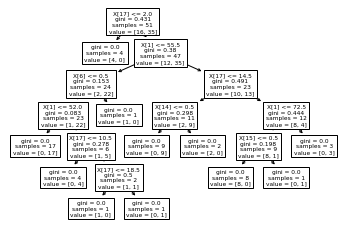

In [490]:
# visualize your tree using plot_tree inside sklearn (its version should be >= 0.21) and dtreeplt
from sklearn import tree
tree.plot_tree(clf);
# !pip install dtreeplt

#### KNN Classifier

In [491]:
# classify test data with KNN classifier of sklearn (for each possible k value)
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(X, y)





KNeighborsClassifier()

In [492]:

# calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure, confusion matrix  
#           based on your defined functions (using k=7)
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=7)
model3.fit(X, y)
y_pred = model3.predict(X)
print('Accuracy: ',metrics.accuracy_score(y, y_pred))
error=1-metrics.accuracy_score(y, y_pred)
print("Error score is", error)

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y, y_pred)
TN, FP, FN, TP = confusion_matrix(y, y_pred).ravel()

print('True Positive: ', TP )
print('True Negative: ', TN )
print('False Positive: ', FP )
print('False Negative: ', FN )

recall = TP / float(FN + TP)
print("Recall score is",recall)
#precision
precision = TP / float(TP + FP)
print("Precision score is",precision)
#sensitivity
sensitivity = TP / float(FN + TP)
print("Sensitivity score is",sensitivity)
#specifity
print("Specificity with Formulas: ", TN/(TN+FP))
F1_1 = 2 * (precision * recall) / (precision + recall)
print("F1 measure is",F1_1)

Accuracy:  0.6438356164383562
Error score is 0.3561643835616438
True Positive:  38
True Negative:  9
False Positive:  15
False Negative:  11
Recall score is 0.7755102040816326
Precision score is 0.7169811320754716
Sensitivity score is 0.7755102040816326
Specificity with Formulas:  0.375
F1 measure is 0.7450980392156863


Text(0, 0.5, 'Testing Errors')

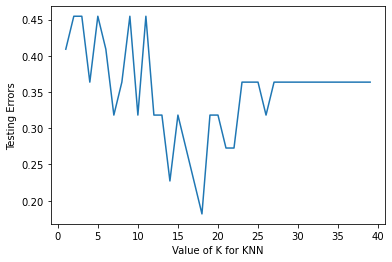

In [493]:
# plot test errors for each k
k_range = range(1, 40)
errors=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(1-metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, errors)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Errors')

### Evaluation Part: Decision Boundries, ROC Curves, Performance Comparisons

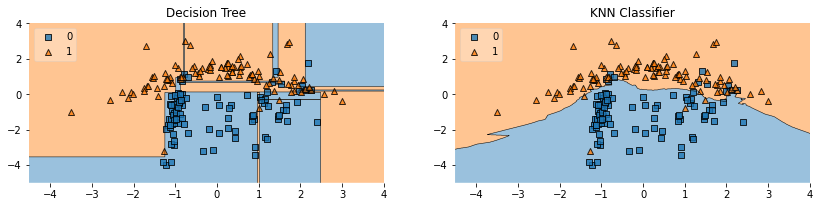

In [437]:
# show decision boundaries for each classifiers on same plot (show pairwise since we have more than 2 attiributes)
from sklearn.datasets import make_classification 
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB

# Initializing Classifiers

clf = DecisionTreeClassifier()
#model = MultinomialNB()
model3 = KNeighborsClassifier()


import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline
gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(14,10))
labels = [ 'Decision Tree', 'KNN Classifier','Bayes']
for clf, lab, grd in zip([ clf, model3, model],
                         labels,
                         [(0,0), (0,1)]):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()


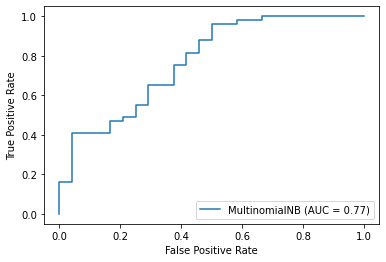

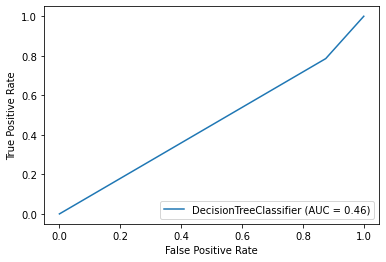

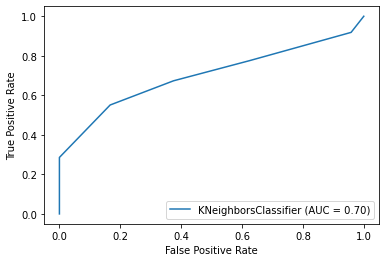

In [494]:
# draw ROC curves for each classifier
from sklearn import  metrics
metrics.plot_roc_curve(model, X, y)
plt.show()
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()
metrics.plot_roc_curve(model3, X, y)
plt.show()


In [495]:
# show classification results based on all measures (acc,err,recall, specifity, etc.) inside a table. 
dict1 = dict(Accuracy=0.712, Error=0.287, Recall=0.816, Precision=0.784,Sensitivity=0.816, Specifity=0.541, F1Measure=0.8)
dict2 = dict(Accuracy=0.5, Error=0.5, Recall=0.78, Precision=0.57, Sensitivity=0.78,Specifity=0.0, F1Measure=0.66 )
dict3 = dict(Accuracy=0.643, Error=0.356, Recall=0.77, Precision=0.71, Sensitivity=0.77,Specifity=0.37,F1Measure=0.74)
data1 = dict(MultinomialBayesClassifier=dict1, DecisionTreeClassifier=dict2, KNNClassifier=dict3)
df1 = pd.DataFrame(data1)
df1

,MultinomialBayesClassifier,DecisionTreeClassifier,KNNClassifier
Accuracy,0.712,0.50,0.643
Error,0.287,0.50,0.356
Recall,0.816,0.78,0.770
Precision,0.784,0.57,0.710
Sensitivity,0.816,0.78,0.770
Specifity,0.541,0.00,0.370
F1Measure,0.800,0.66,0.740
